# EM(Expectation-Maximization) algorithm

## Gaussian function

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
def gauss(x, mu, sigma, eps=1e-8):
    return 1./np.sqrt(np.pi*2*sigma**2+eps) * np.exp(-(x-mu)**2/(2*sigma**2+eps))

In [139]:
def gauss_vec(x, mu, sigma, eps=1e-8):
    """ x:  Nx1
        mu: 1xm"""
    x = x.reshape(-1, 1)
    mu = mu.reshape(1, -1)
    x = x.repeat(mu.shape[1], axis=1)
    mu = mu.repeat(x.shape[0], axis=0)
    return gauss(x, mu, sigma, eps)

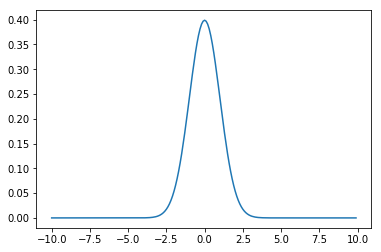

In [124]:
x = np.arange(-10, 10, 0.1)
y = gauss(x, 0, 1)
plt.plot(x, y)
plt.show()

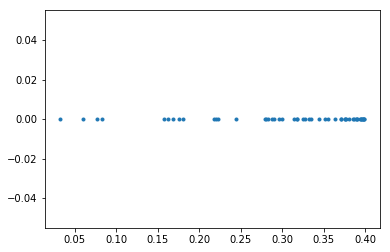

In [138]:
plt.plot(gauss_vec(t, np.array([1]), SIGMA).squeeze(1), np.zeros_like(gauss_vec(t, np.array([1]), SIGMA).squeeze(1)), '.')

## EM

In [22]:
SIGMA = 1

In [99]:
def init_h_of_mu(k, begin, stop):
    return (np.random.rand(k)*(stop-begin)+begin).reshape(1, -1)

In [239]:
def step1_calculate_Expectation(x, h_of_mu):
    # posibility
    p = gauss_vec(x, h, SIGMA)
    p = p/np.sum(p, axis=1, keepdims=True)
    return p    

In [242]:
def step2_calculate_h_of_mu(x, expetation):
    return np.sum(x * expetation, axis=0)/np.sum(expetation, axis=0)

In [262]:
k = 3
h = init_h_of_mu(k, -20, 20)
print(h)
for i in range(10):
    p = step1_calculate_Expectation(t.reshape(-1, 1), h)
    h = step2_calculate_h_of_mu(t.reshape(-1, 1), p)
    print(h)

[[-2.27021436 -8.44157772 -2.63748248]]
[ 8.21343293 -2.07567921  1.58702037]
[11.02493292 -0.59211363  1.33722335]
[11.68124603  0.17705603  2.51506037]
[12.88151772  0.51719481  4.42662552]
[14.72983321  0.87667777  6.40027553]
[14.97459046  1.04177454  6.90820409]
[14.97836755  1.05374323  6.92443208]
[14.97838465  1.05443516  6.92511321]
[14.9783852   1.05446937  6.92514643]
[14.97838522  1.05447105  6.92514806]


## Generate dataset

In [232]:
def get_multi_gauss(mu=[1, 7, 15]):
    samples = 200
    
    mu = np.array([mu]).reshape(1, -1)
    mu = mu.repeat(samples, axis=0)
    ds = np.random.randn(samples, mu.shape[1])*SIGMA
#     ds += np.random.randn(*ds.shape)*0.01
    
    return (ds + mu).reshape(-1)

In [244]:
t = get_multi_gauss([1, 7, 15])
# t = get_multi_gauss([-15, 15])

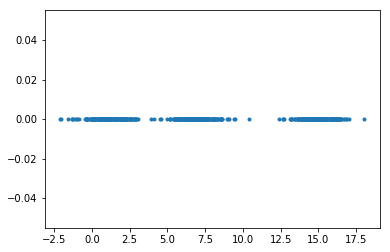

In [245]:
plt.plot(t, np.zeros_like(t), '.')